In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load in the data
loans = pd.read_csv('loan_data.csv')

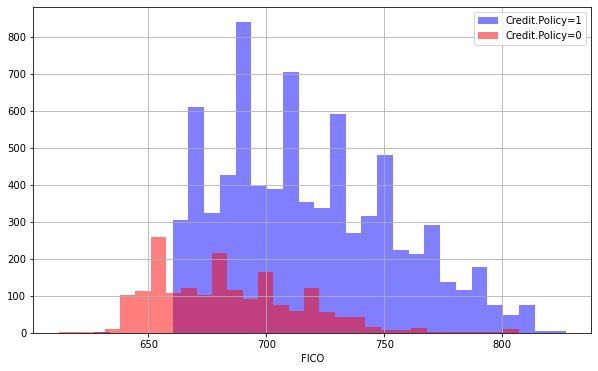

In [10]:
# Exploratory data analysis

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO');

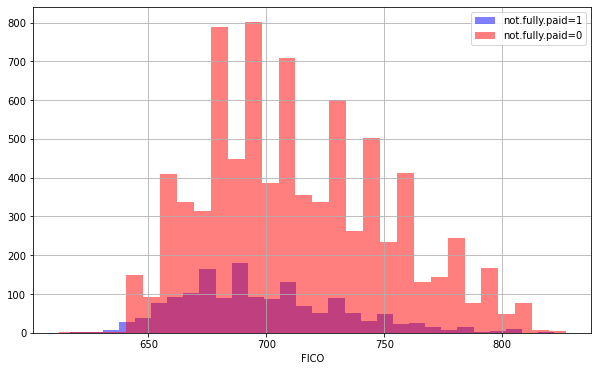

In [13]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO');

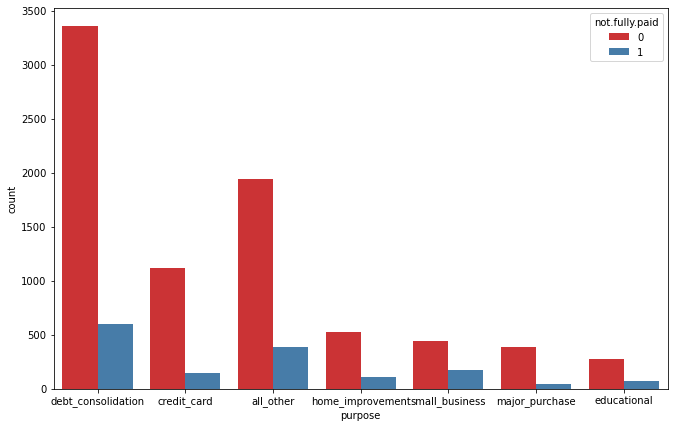

In [14]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1');

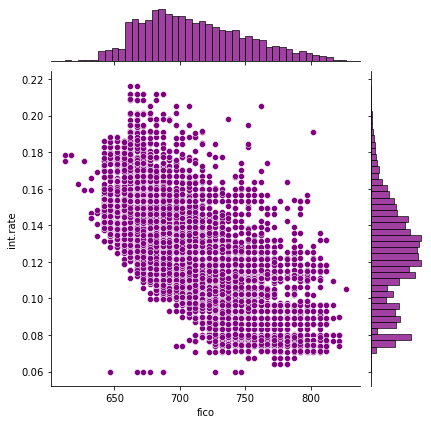

In [15]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple');

<Figure size 792x504 with 0 Axes>

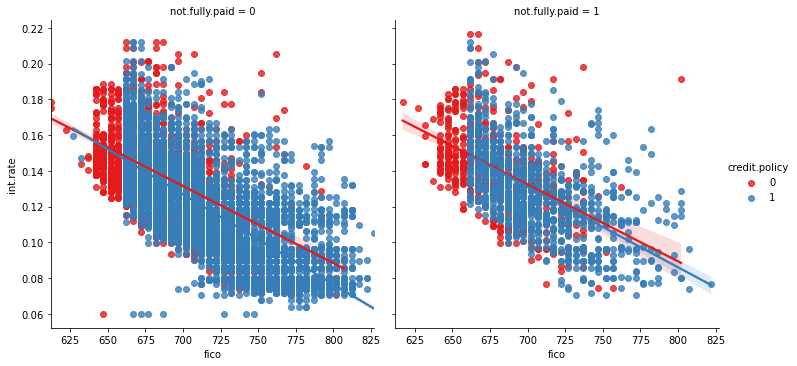

In [16]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set1');

In [17]:
# Create categorical features (0s and 1s)

cat_feats = ['purpose']

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [19]:
# Split data into training set and testing set
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
# Train a Decion Tree model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
# Apply Decion Tree model to test data
predictions = dtree.predict(X_test)

In [22]:
# Analyze Decision Tree results
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



[[1995  436]
 [ 337  106]]


In [24]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [25]:
# Apply Random Forest model to test data
predictions = rfc.predict(X_test)

In [26]:
# Analyze Random Forest results
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.65      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.75      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



[[2425    6]
 [ 432   11]]
